## KNN e Árvore de Regressão

O objetivo deste exercício é se aprofundar nos conceitos de regressão e implementar os algoritmos de K-vizinhos mais próximos (KNN) e Árvore de Regressão.

Utilizaremos as mesmas bases de dados do exercício anterior:

In [1]:
import pandas as pd

dados_adv = pd.read_csv('Advertising.csv', index_col=0)

dados_por = pd.read_csv('Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

O algoritmo KNN é implementado pela classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">KNeighborsRegressor</a>:

In [2]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2,weights='uniform')
neigh.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

Aqui, o algoritmo é configurado com K = 2 e o peso de cada instância é definido uniformemente.

O "formato" do modelo aprendido pelo KNN é bem diferente do aprendido pela regressão linear:

Text(0, 0.5, 'Preço')

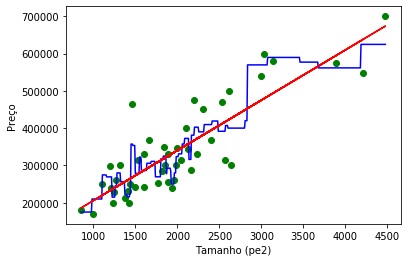

In [3]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np


linear = LinearRegression().fit(X,y)

T = np.linspace(min(X.values.ravel()),max(X.values.ravel()), 500 )[:, np.newaxis]
y_ = neigh.predict(T)


plt.scatter(X, y,color='g')
plt.plot(T, y_,color='b')
plt.plot(X, linear.predict(X),color='r')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

A parametrização K e o peso das instâncias podem ser alteradas no momento da instanciação do objeto, por exemplo:
    
```python
    neigh = KNeighborsRegressor(n_neighbors=3,weights='uniform') # K = 3, peso uniforme
    neigh = KNeighborsRegressor(n_neighbors=2,weights='distance') # K = 2, peso baseado na distância
```    

## Exercício 1

Para as duas bases de treinamento de regressão (<i>Advertising</i> e <i>Portland_housePrices</i>), avalie quais são as melhores parametrizações (use inspeção visual e RSS/R^2).
    
    

## Árvore de Regressão

A árvore de decisão é implementada através da classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">DecisionTreeRegressor</a>.


In [4]:
from sklearn.tree import DecisionTreeRegressor  
#Regression tree
# create a regressor object 
tree = DecisionTreeRegressor()  
  
    

# fit the regressor with X and Y data 
tree.fit(X, y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Text(0, 0.5, 'Preço')

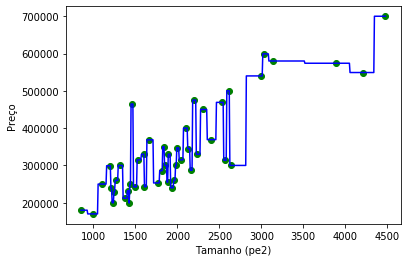

In [5]:
plt.scatter(X, y,color='g')
y_t = tree.predict(T)
plt.plot(T, y_t,color='b')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

É possível também gerar a árvore resultante para visualização:

In [6]:
from sklearn.tree import export_graphviz  
 

export_graphviz(tree, out_file ='tree.dot', 
               feature_names =['Tamanho'])

Este código irá gerar um arquivo <b>tree.dot</b>.

Esse arquivo pode ser visualizado no site <a href='http://www.webgraphviz.com/'>http://www.webgraphviz.com</a>

## Exercício 2

Qual seria o melhor método para montar um modelo em cada uma das bases com Árvore de Decisão?

Utilizar apenas um atributo? multiplos? quais seriam?

Scores R^2:
tam:       1.0
qua:       0.2832148809431506
tam + qua: 1.0


[Text(0, 0.5, 'Preço'), Text(0.5, 0, 'Quartos')]

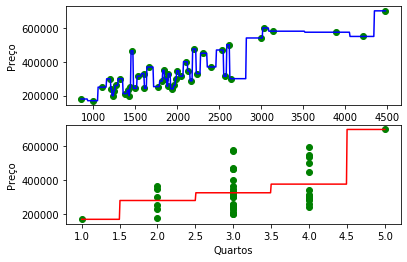

In [7]:
from sklearn.metrics import r2_score


X_tam = dados_por.loc[:,['tamanho']]
X_qua = dados_por.loc[:,['quartos']]
X_all = dados_por.loc[:,['tamanho','quartos']]
y = dados_por.loc[:,['preco']]

tree_tam = DecisionTreeRegressor().fit(X_tam,y)
r2_tam = r2_score(y,tree_tam.predict(X_tam))

tree_qua = DecisionTreeRegressor().fit(X_qua,y)
r2_qua = r2_score(y,tree_qua.predict(X_qua))

tree = DecisionTreeRegressor().fit(X_all,y)
r2_all = r2_score(y,tree.predict(X_all))

print("Scores R^2:")
print("tam:       "+str(r2_tam))
print("qua:       "+str(r2_qua))
print("tam + qua: "+str(r2_all))

fig, axs = plt.subplots(2)


T = np.linspace(min(X_tam.values.ravel()),max(X_tam.values.ravel()), 500 )[:, np.newaxis]
axs[0].scatter(X_tam, y,color='g')
y_t = tree_tam.predict(T)
axs[0].plot(T, y_t,color='b')

axs[0].set(xlabel='Tamanho (pe2)',ylabel='Preço')



T = np.linspace(min(X_qua.values.ravel()),max(X_qua.values.ravel()), 500 )[:, np.newaxis]
axs[1].scatter(X_qua, y,color='g')
y_t = tree_qua.predict(T)
axs[1].plot(T, y_t,color='r')

axs[1].set(xlabel='Quartos',ylabel='Preço')




## Comparação entre modelos

Agora já sabemos como implementar um modelo linear multivariado:

```python
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X,y)
```

como implementar o regressor KNN:

```python
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor().fit(X,y)
```

e como implementar uma árvore de regressão:

```python
from sklearn.tree import DecisionTreeRegressor  
tree = DecisionTreeRegressor().fit(X,y)
```

Conhecemos todos os algoritmos e seus parâmetros, agora como decidir <b>qual</b> deles usar efetivamente? Olhar o <i>fitting</i> em sua base de dados e tomar isso como verdade absoluta pode ser completamente enganoso.

Podemos tentar <i>aliviar</i> esse problema fazendo uma comparação mais inteligente

## Exercício 3

1) Separe as bases <i>Portland_housePrices</i> e <i>Advertising</i> em conjuntos de <i>treinamento</i> e <i>teste</i> (30% das instâncias para teste e 70% para treinamento).

2) Utilize as bases de treinamento para treinar os modelos a serem avaliados, e as bases de teste para avaliar o desempenho regressor dos modelos.

3) Qual é o melhor modelo para cada problema? Por que você fez essa recomendação? (mostre métricas, gráficos, ou as evidências que julgar necessárias).

In [8]:
import numpy as np
#30% de teste, 70% de treinamento
msk_por = np.random.rand(len(dados_por)) < 0.7

train_por = dados_por[msk_por]
test_por = dados_por[~msk_por]

X_train = train_por.loc[:,['tamanho','quartos']]
X_test  = test_por.loc[:,['tamanho','quartos']]
y_train = train_por.loc[:,['preco']]
y_test  = test_por.loc[:,['preco']]


tree = DecisionTreeRegressor().fit(X_train,y_train)
r2_tree = r2_score(y_test,tree.predict(X_test))
r2_tree_treino = r2_score(y_train,tree.predict(X_train))

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor().fit(X_train,y_train)
r2_neigh = r2_score(y_test,neigh.predict(X_test))
r2_neigh_treino = r2_score(y_train,neigh.predict(X_train))

from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train,y_train)
r2_linear = r2_score(y_test,linear.predict(X_test))
r2_linear_treino = r2_score(y_train,linear.predict(X_train))


print("Scores R^2 Treino:")
print("Arvore:       "+str(r2_tree_treino))
print("KNN:       "+str(r2_neigh_treino))
print("linear: "+str(r2_linear_treino))


print("Scores R^2 Teste:")
print("Arvore:       "+str(r2_tree))
print("KNN:       "+str(r2_neigh))
print("linear: "+str(r2_linear))



Scores R^2 Treino:
Arvore:       1.0
KNN:       0.7945901729711132
linear: 0.7674419525048161
Scores R^2 Teste:
Arvore:       0.1798131261256074
KNN:       0.554067671809003
linear: 0.5680722501694635


[Text(0, 0.5, 'Preço'), Text(0.5, 0, 'Quartos')]

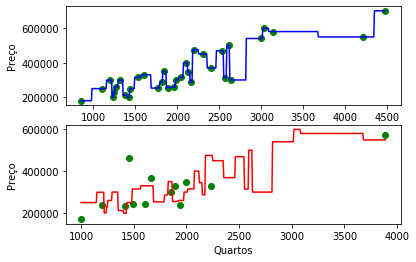

In [9]:
X_train = train_por.loc[:,['tamanho']]
X_test  = test_por.loc[:,['tamanho']]
y_train = train_por.loc[:,['preco']]
y_test  = test_por.loc[:,['preco']]

tree_tam = DecisionTreeRegressor().fit(X_train,y_train)
r2_tam = r2_score(y,tree_tam.predict(X_tam))

fig, axs = plt.subplots(2)


T = np.linspace(min(X_train.values.ravel()),max(X_train.values.ravel()), 500 )[:, np.newaxis]
axs[0].scatter(X_train, y_train,color='g')
y_t = tree_tam.predict(T)
axs[0].plot(T, y_t,color='b')

axs[0].set(xlabel='Tamanho (pe2)',ylabel='Preço')



T = np.linspace(min(X_test.values.ravel()),max(X_test.values.ravel()), 500 )[:, np.newaxis]
axs[1].scatter(X_test, y_test,color='g')
y_t = tree_tam.predict(T)
axs[1].plot(T, y_t,color='r')

axs[1].set(xlabel='Quartos',ylabel='Preço')
